In [1]:
import numpy as np
from Ridge import Ridge_parameters
from prepare_data import prepare_data
from polynomial_features import polynomial_features
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

Quick check to see if ridge_parameter functions works as expected

In [2]:
pol = 5
X_train = polynomial_features(x_train,pol, False)
X_test = polynomial_features(x_test, pol, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

beta_Ridge = Ridge_parameters(X_train_s,y_train,1)
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  
ridge.fit(X_train, y_train)
ridge_step = ridge.named_steps["ridge"]

print(f"Our selfmade Ridge function has the parameters: {beta_Ridge}")
print(f"The imported Ridge function has the parameters: {ridge_step.coef_}")

Our selfmade Ridge function has the parameters: [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]
The imported Ridge function has the parameters: [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


We can see that we get the same parameters

In [6]:
pol = 15
# lambdas = np.concatenate((np.logspace(1,-5,14),np.array([0])))
lambdas = [0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]

mse_r2_scores = np.zeros((15,8))

pol_degrees = np.arange(1,pol+1,dtype=int)


for pol in pol_degrees:    
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    for i,lam in enumerate(lambdas):
        beta_Ridge = Ridge_parameters(X_train_s,y_train,lambda_=lam)
        y_test_fit = X_test_s@beta_Ridge
        mse_r2_scores[pol-1,i] = mse(y_test,y_test_fit+y_offset)

df = pd.DataFrame(mse_r2_scores)
df.index = pol_degrees
df.columns = lambdas
df = df.rename_axis("Pol deg", axis=0).rename_axis("Lambda", axis=1)
df

Lambda,0.00000,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000,10.00000
Pol deg,,,,,,,,
1,0.073961,0.073961,0.073961,0.073961,0.073961,0.073957,0.073919,0.073586
2,0.044121,0.044121,0.044121,0.044120,0.044115,0.044063,0.043561,0.039889
3,0.046265,0.046265,0.046264,0.046263,0.046253,0.046148,0.045205,0.040157
4,0.022012,0.022012,0.022011,0.021999,0.021882,0.020808,0.016504,0.032569
5,0.022425,0.022425,0.022423,0.022409,0.022269,0.021031,0.016482,0.032857
6,0.016000,0.015997,0.015971,0.015717,0.013556,0.008532,0.018819,0.026696
7,0.015683,0.015680,0.015656,0.015417,0.013372,0.008566,0.018794,0.026807
8,0.010057,0.009994,0.009456,0.005914,0.007315,0.012687,0.015677,0.025826
9,0.010613,0.010543,0.009941,0.006134,0.007272,0.012625,0.015671,0.025864


In [11]:
latex_code = df.to_latex(index=False)

with open("table.tex", "w") as f:
    f.write(latex_code)

We had from the OLS that the polynomial of degree 8 had the lowest MSE.

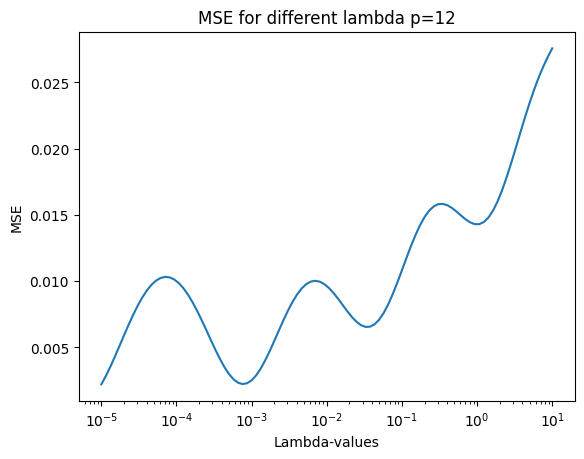

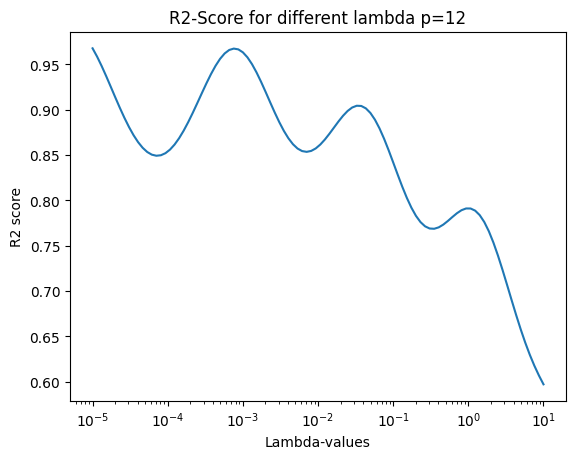

In [ ]:
lambdas = np.logspace(1,-5,100)
n = len(lambdas)

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,8, False)
    X_test = polynomial_features(x_test, 8, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

plt.plot(lambdas,mse_scores)
plt.title("MSE for different lambda p=8")
plt.xscale("log")
plt.xlabel("Lambda-values")
plt.ylabel("MSE")
plt.show()

plt.plot(lambdas,r2_scores)
plt.title("R2-Score for different lambda p=8")
plt.xscale("log")
plt.xlabel("Lambda-values")
plt.ylabel("R2 score")
plt.show()

We had the lowest MSE in the table with a value of 0.002194 with a lambda of 10e-5 and polynomial degree of 10

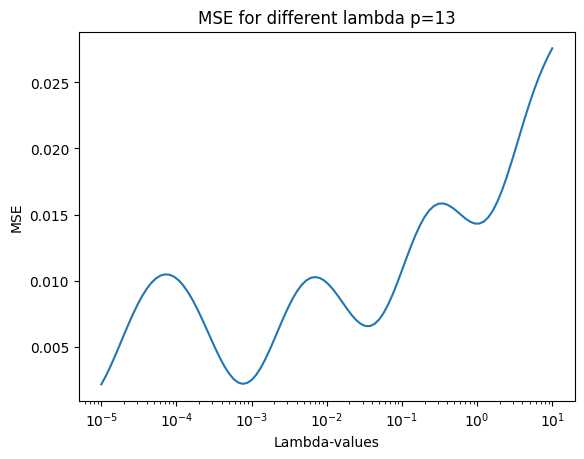

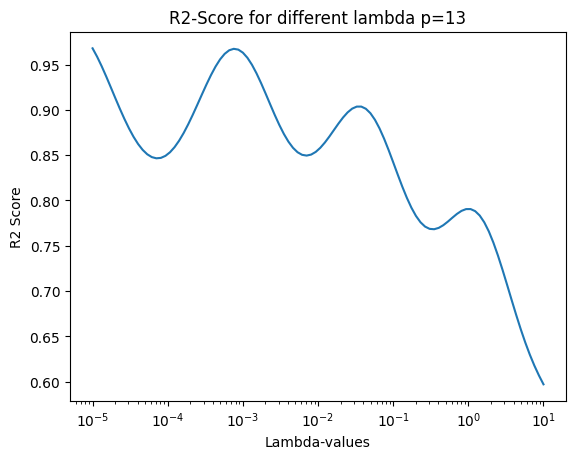

In [ ]:
lambdas = np.logspace(1,-5,100)
n = len(lambdas)

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,10, False)
    X_test = polynomial_features(x_test, 10, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

plt.plot(lambdas,mse_scores)
plt.xscale("log")
plt.title("MSE for different lambda p=10")
plt.xlabel("Lambda-values")
plt.ylabel("MSE")
plt.show()

plt.plot(lambdas,r2_scores)
plt.xscale("log")
plt.title("R2-Score for different lambda p=10")
plt.xlabel("Lambda-values")
plt.ylabel("R2 Score")
plt.show()

See how $\theta$ blows up as parameters increase

In [ ]:
deg_max = 20 


plt.figure()
markers = ['o', 's', '^', 'D', 'v', 'p', 'h', '8', '*', '+', 'x', '|', '_', '1', '2', '3', '4', '<', '>', 'H', 'X', 'P', 'D', 'o', 's']  # More shapes for higher degrees
colors = ['#FF6F61', '#40C4FF', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688', '#FFC107', '#8BC34A', '#FF9800', '#F44336', '#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688']  # More colors

# Degrees to show
plot_degrees = list(range(1, 21))  # Show all degrees from 1 to 20

# Track which parameters we've already added to legend
legend_added = set()

# Plot parameters correctly: for each degree, plot only the parameters that exist
for degree in plot_degrees:
    if degree <= deg_max:  # Make sure we don't exceed our data
        degree_params = parameters[degree-1, :degree]  # Get only the valid parameters for this degree
        degree_x = np.full(degree, degree)  # x-coordinates (all at the same degree)
        degree_y = degree_params  # y-coordinates (the parameter values)
        
        # Plot each parameter for this degree
        for i in range(degree):
            # Only add to legend if we haven't seen this parameter before
            label = f'β{i+1}' if i not in legend_added else ""
            if label:
                legend_added.add(i)
            
            plt.scatter(degree_x[i], degree_y[i], 
                       marker=markers[i % len(markers)],
                       color=colors[i % len(colors)], 
                       s=60, alpha=0.8, label=label)

plt.title("OLS Parameters vs Polynomial Degree", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.ylabel("Parameters", fontsize=12, fontfamily='sans-serif')
plt.yscale('symlog')  # Set y-axis to log scale

# Set x-axis ticks to show every whole number
plt.xticks(range(1, max(plot_degrees) + 1))

plt.grid(True, linestyle='--', alpha=0.7)

# Add legend to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

fig = plt.gcf()
fig.set_size_inches(10, 6)   # <- increased size to accommodate more data and legend
plt.savefig("Plots/ols_parameters_by_degree.pdf", bbox_inches="tight")
plt.show()
